In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
train = pd.read_csv("C:\\Users\\mohan\\Downloads\\train (1).csv")
test = pd.read_csv("C:\\Users\\mohan\\Downloads\\test (1).csv")
testID = test['Id']

data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
data.drop(['Id'], axis=1, inplace=True)

In [3]:
data.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0          60       RL         65.0     8450   Pave   NaN      Reg   
      1          20       RL         80.0     9600   Pave   NaN      Reg   

        LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  \
train 0         Lvl    AllPub    Inside  ...           0        0    NaN   
      1         Lvl    AllPub       FR2  ...           0        0    NaN   

        Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
train 0   NaN         NaN       0       2    2008        WD         Normal  
      1   NaN         NaN       0       5    2007        WD         Normal  

[2 rows x 79 columns]

In [4]:
years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
metrics = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
         'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [5]:
data[years].max()

YearBuilt       2010.0
YearRemodAdd    2010.0
GarageYrBlt     2207.0
YrSold          2010.0
dtype: float64

In [6]:
mask = (data[years] > 2016).any(axis=1) # take any index with a twisted year value
data[mask]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
test,1132,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


In [7]:
data.loc[mask, 'GarageYrBlt'] = data[mask]['YearBuilt']

In [8]:
mask = (data[metrics] < 0).any(axis=1)
data[mask]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [9]:
mask = ((data['MoSold'] > 12) | (data['MoSold'] < 1))
data[mask]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [10]:
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold']    

# We need to convert literal grades to a numerical scale
grades = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
literal = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num = [9, 7, 5, 3, 2]
G = dict(zip(literal, num))

data[grades] = data[grades].replace(G)
# Categorical features: everything that is not 'numerical'
cat_feats = data.drop(num_feats, axis=1).columns

In [11]:
cat_feats

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#log transform the target:
price = np.log1p(train['SalePrice'])

#log transform skewed continuous numerical features:
skewed_feats = data.loc['train'][metrics].apply(lambda x: x.skew(skipna=True)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [13]:
data.isnull().sum()[data.isnull().sum() > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [14]:
feats = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Functional',
         'SaleType']
model = data.loc['train'].groupby('Neighborhood')[feats].apply(lambda x: x.mode().iloc[0])

for f in feats:
    data[f].fillna(data['Neighborhood'].map(model[f]), inplace=True)

<Axes: xlabel='LotConfig', ylabel='LotFrontage'>

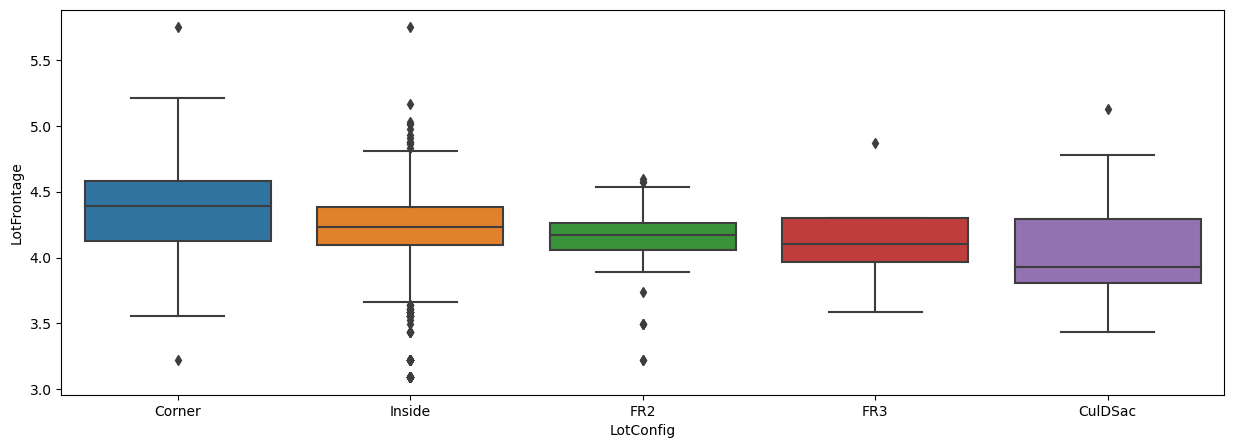

In [15]:
plt.subplots(figsize=(15,5))
boxdata = data.loc['train'].groupby('LotConfig')['LotFrontage'].median().sort_values(ascending=False)
order = boxdata.index
sns.boxplot(x='LotConfig', y='LotFrontage', order=order, data=data.loc['train'])

In [16]:
data['LotFrontage'] = data['LotFrontage'].fillna(data.loc['train', 'LotFrontage'].median())

In [17]:
data['KitchenQual'].fillna(data['OverallQual'], inplace=True)

In [18]:
bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath',
        'BsmtHalfBath', 
        'TotalBsmtSF']
fire = ['Fireplaces', 'FireplaceQu']
garage = ['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 
          'GarageArea', 'GarageYrBlt']
masn = ['MasVnrType', 'MasVnrArea']
others = ['Alley', 'Fence', 'PoolQC', 'MiscFeature']

cats = data.columns[data.dtypes == 'object']
nums = list(set(data.columns) - set(cats))

# Be sure the category 'None' is also handled here
data['MasVnrType'].replace({'None': np.nan}, inplace=True)

data[cats] = data[cats].fillna('0')
data[nums] = data[nums].fillna(0)
data.isnull().sum().sum()

0

In [19]:
data.isnull().sum().sum()

0

In [20]:
data['MSSubClass'] = data['MSSubClass'].astype('object', copy=False)
data['MoSold'] = data['MoSold'].astype('object', copy=False)
data['BsmtFullBath'] = data['BsmtFullBath'].astype('int64', copy=False)
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('int64', copy=False)
data['GarageCars'] = data['GarageCars'].astype('int64', copy=False)
data[years] = data[years].astype('int64', copy=False)

In [21]:
categorical_data = pd.concat((data.loc['train'][cat_feats], price), axis=1)

In [22]:

low = 0.05 * data.loc['train'].shape[0] # at least 5% of the dataset should have this value

for feat in cat_feats:        
    # we will group the categories based on the average sale price
    order = ((categorical_data.groupby(feat).mean()).sort_values(by='SalePrice', 
                                                      ascending=False).index.values.tolist())
    for i in range(0, len(order)):
        N = (categorical_data[categorical_data[feat] == order[i]]
             .count().max())
        j = i
        while (N < low) & (N != 0):
            j += 1

            if (j > len(order) - 1):
                # if reached the end of list, go back to last
                # useful category of the 'order' list
                j = i - 1
                break
            else: 
                N += (categorical_data[categorical_data[feat] == order[j]]
                      .count().max())
        if j < i:
            lim = len(order)
        else:
            lim = j

        for k in range(i, lim):
            categorical_data.replace({feat: {order[k]: order[j]}},
                                 inplace=True)
            data.replace({feat: {order[k]: order[j]}},
                                     inplace=True)            
    uniD = data[feat].unique()
    order = categorical_data[feat].unique()

    for i in uniD:
        if i not in order:
            ind = np.argsort(order - i)[0]
            data.replace({feat: {i: order[ind]}}, inplace=True)


C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = ((categorical_data.groupby(feat).mean()).sort_values(by='SalePrice',
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = ((categorical_data.groupby(feat).mean()).sort_values(by='SalePrice',
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeri

C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = ((categorical_data.groupby(feat).mean()).sort_values(by='SalePrice',
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = ((categorical_data.groupby(feat).mean()).sort_values(by='SalePrice',
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2436438579.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeri

In [23]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [24]:
# Remove columns with just one category
for feat in categorical_data.columns[:-1]:    
    uni = categorical_data.groupby(feat).mean().sort_values(by='SalePrice').index
    if (len(uni) < 2):
            data.drop(feat, axis=1, inplace=True)
    elif len(uni) < 3:
        print("{}: {}".format(feat, uni))
        data[feat].replace({uni[0]: 0, uni[1]: 1}, inplace=True)
        data[feat] = data[feat].astype('int8')
    else:
        data[feat] = data[feat].astype('category')
        

MSZoning: Index(['RM', 'RL'], dtype='object', name='MSZoning')
Alley: Index(['Grvl', '0'], dtype='object', name='Alley')
LotShape: Index(['Reg', 'IR1'], dtype='object', name='LotShape')
LandContour: Index(['Lvl', 'Low'], dtype='object', name='LandContour')
LandSlope: Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')
Condition1: Index(['Feedr', 'Norm'], dtype='object', name='Condition1')
RoofStyle: Index(['Gable', 'Hip'], dtype='object', name='RoofStyle')
BsmtFinType2: Index(['Rec', 'Unf'], dtype='object', name='BsmtFinType2')
CentralAir: Index(['N', 'Y'], dtype='object', name='CentralAir')
Electrical: Index(['FuseA', 'SBrkr'], dtype='object', name='Electrical')
Functional: Index(['Min2', 'Typ'], dtype='object', name='Functional')
PavedDrive: Index(['N', 'Y'], dtype='object', name='PavedDrive')
Fence: Index(['MnPrv', '0'], dtype='object', name='Fence')
SaleType: Index(['WD', 'New'], dtype='object', name='SaleType')


C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2716824016.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uni = categorical_data.groupby(feat).mean().sort_values(by='SalePrice').index
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2716824016.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uni = categorical_data.groupby(feat).mean().sort_values(by='SalePrice').index
C:\Users\mohan\AppData\Local\Temp\ipykernel_16132\2716824016.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nume

In [25]:
finaldata = pd.get_dummies(data)

In [26]:
black_list = bsmt + fire + garage + masn + others
for feat in finaldata.columns:
    if ('_0' in feat) and (feat.split("_")[0] in black_list):
        finaldata.drop(feat, axis=1, inplace=True)

In [27]:
finaldata.shape

(2919, 131)

In [28]:
# Training/testing sets
X_test = finaldata.loc['test']
X_train = finaldata.loc['train']

y_train = price

In [29]:
m = X_train.mean()
std = X_train.std()

X_train = (X_train - m) / std
X_test = (X_test - m) / std

In [30]:
# Create linear regression object
LR = LinearRegression()

# Train the model using the training sets
LR.fit(X_train, y_train)

LinearRegression()

In [31]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

Neighborhood_NAmes....... -3.5170e+10
BldgType_1Fam............ -3.1876e+10
Neighborhood_CollgCr..... -3.1003e+10
Neighborhood_BrDale...... -2.7549e+10
Neighborhood_NridgHt..... -2.6550e+10


In [32]:
# Create linear regression object
Ls = LassoCV()

# Train the model using the training sets
Ls.fit(X_train, y_train)

LassoCV()

In [33]:
maxcoef = np.argsort(-np.abs(Ls.coef_))
coef = Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.1707e-01
OverallQual..............  8.0499e-02
OverallCond..............  4.0788e-02
GarageCars...............  3.7414e-02
YearBuilt................  3.4131e-02


In [34]:
# Create linear regression object
Rr = RidgeCV()

# Train the model using the training sets
Rr.fit(X_train, y_train)

RidgeCV()

In [35]:
maxcoef = np.argsort(-np.abs(Rr.coef_))
coef = Rr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.2397e-01
OverallQual..............  7.1496e-02
OverallCond..............  4.4677e-02
GarageCars...............  4.0283e-02
GarageYrBlt.............. -3.4590e-02


In [36]:
# Create linear regression object
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here

# Train the model using the training sets
train_EN = EN.fit(X_train, y_train)

In [37]:
maxcoef = np.argsort(-np.abs(EN.coef_))
coef = EN.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(finaldata.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.1707e-01
OverallQual..............  8.0499e-02
OverallCond..............  4.0788e-02
GarageCars...............  3.7414e-02
YearBuilt................  3.4131e-02


In [38]:
model = [Ls, Rr, EN]
M = len(model)
CV = 5
score = np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], X_train, y_train, cv=CV)

In [39]:
print(score.mean(axis=1))

[0.90025676 0.89351064 0.89998042]


In [40]:
submit = pd.DataFrame({'Id': testID, 'SalePrice': np.exp(EN.predict(X_test))})
submit.to_csv('submission.csv', index=False)